In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:
#df = pd.read_parquet("MergedData/S16.parquet")
data_dir = Path("MergedData")
full_df = pd.DataFrame()
for parquet_file in data_dir.glob('*.parquet'): 
    print(f"reading {parquet_file}")
    full_df = pd.concat( [full_df, pd.read_parquet(parquet_file) ])
    

reading MergedData\S10.parquet
reading MergedData\S11.parquet
reading MergedData\S13.parquet
reading MergedData\S14.parquet
reading MergedData\S15.parquet
reading MergedData\S16.parquet
reading MergedData\S17.parquet
reading MergedData\S2.parquet
reading MergedData\S3.parquet
reading MergedData\S4.parquet
reading MergedData\S5.parquet
reading MergedData\S6.parquet
reading MergedData\S7.parquet
reading MergedData\S8.parquet
reading MergedData\S9.parquet


In [5]:
np.unique( full_df['sid'] )

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17])

In [6]:
full_df = full_df.groupby("sid").sample(n=25000, random_state=42)

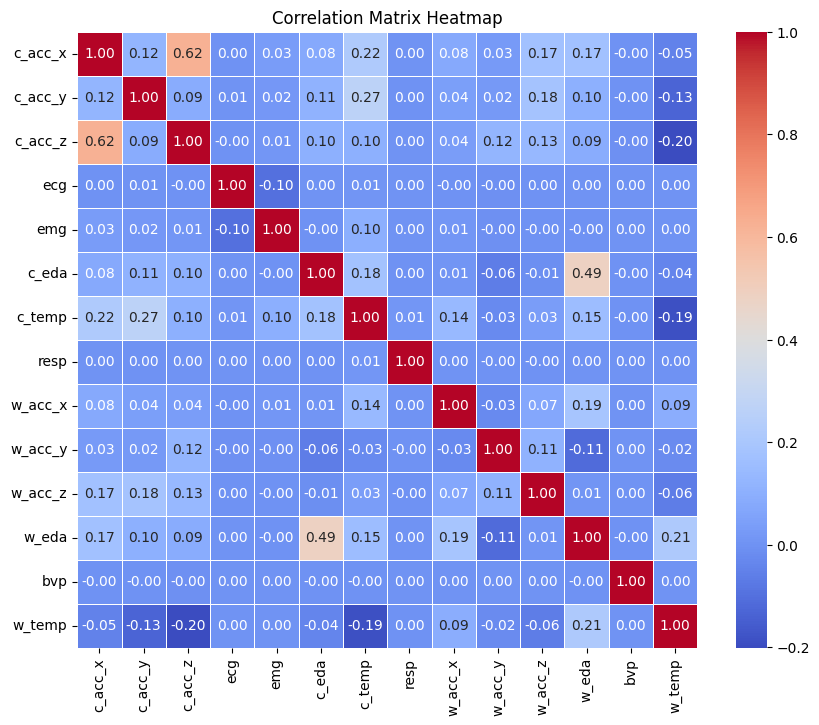

In [7]:
corr_df = full_df.drop( [ "sid", "label"], axis=1)
corr_matrix = corr_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

[0.06829009 0.07497733 0.10822919 0.00232867 0.00266297 0.13376412
 0.10339817 0.00462524 0.06936626 0.08627207 0.0739568  0.12668758
 0.00479771 0.1406438 ]


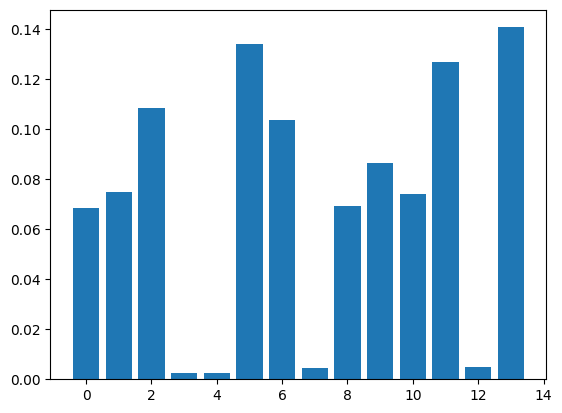

In [9]:
from sklearn.ensemble import RandomForestClassifier

X = full_df.drop( [ 'sid', 'label'], axis=1)
Y = full_df['label']

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, Y)

In [11]:
importance = model.feature_importances_
# summarize feature importance
print(importance)

[0.06829009 0.07497733 0.10822919 0.00232867 0.00266297 0.13376412
 0.10339817 0.00462524 0.06936626 0.08627207 0.0739568  0.12668758
 0.00479771 0.1406438 ]


Index(['c_acc_x', 'c_acc_y', 'c_acc_z', 'ecg', 'emg', 'c_eda', 'c_temp',
       'resp', 'w_acc_x', 'w_acc_y', 'w_acc_z', 'w_eda', 'bvp', 'w_temp'],
      dtype='object')


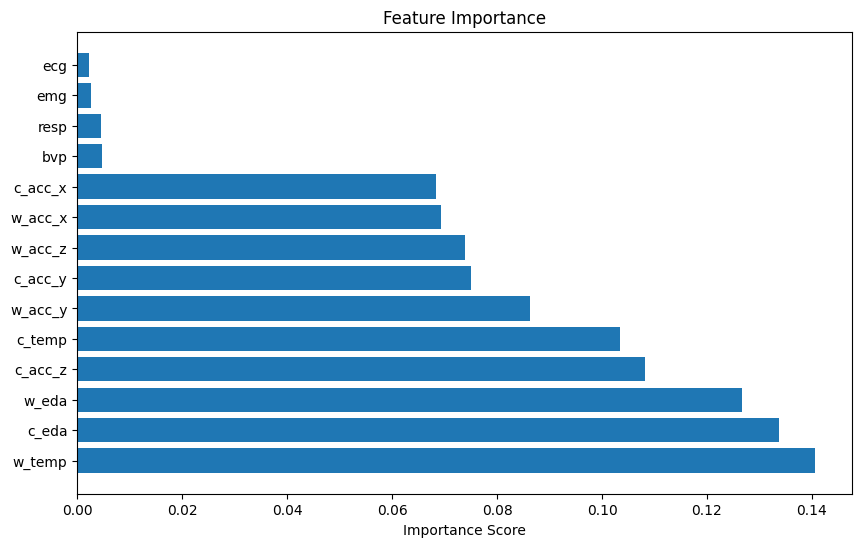

In [15]:
print( X.columns)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [17]:
test_df = pd.read_parquet("MergedData/S11.parquet")

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# test classifier
x_test = test_df.drop( [ 'sid', 'label'], axis=1)
y_test = test_df['label']
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1443400
           1       1.00      1.00      1.00    826000
           2       1.00      0.99      1.00    476000
           3       0.99      0.99      0.99    257600
           4       0.99      1.00      0.99    553701

    accuracy                           0.99   3556701
   macro avg       0.99      0.99      0.99   3556701
weighted avg       0.99      0.99      0.99   3556701

ROC AUC: 1.00
